In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
!pip3 install -U scikit-learn
!pip3 install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 1.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [5]:
# Load the dataset
airline_delay_df = pd.read_csv('Airline_Delay_Cause.csv')
airline_delay_df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


In [6]:
# Dropping rows with missing values in relevant columns
airline_delay_cleaned = airline_delay_df.dropna(subset=['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_delay'])
airline_delay_cleaned

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171661,2013,8,YV,Mesa Airlines Inc.,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",7.0,1.0,0.78,0.00,...,0.0,0.00,0.0,0.0,23.0,18.0,0.0,5.0,0.0,0.0
171662,2013,8,YV,Mesa Airlines Inc.,YUM,"Yuma, AZ: Yuma MCAS/Yuma International",2.0,1.0,0.00,0.00,...,0.0,1.00,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0
171663,2013,8,YV,Mesa Airlines Inc.,SLC,"Salt Lake City, UT: Salt Lake City International",2.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171664,2013,8,DL,Delta Air Lines Inc.,SBN,"South Bend, IN: South Bend International",1.0,1.0,1.00,0.00,...,0.0,0.00,0.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0


In [7]:
# Preparing data for regression
X = airline_delay_cleaned[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]
y = airline_delay_cleaned['arr_delay']

In [8]:
X

,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,2.25,1.60,3.16,0.0,5.99
1,1.97,0.04,0.57,0.0,7.42
2,2.73,1.18,1.80,0.0,4.28
3,3.69,2.27,4.47,0.0,1.57
4,7.76,0.00,2.96,0.0,11.28
...,...,...,...,...,...
171661,0.78,0.00,0.22,0.0,0.00
171662,0.00,0.00,0.00,0.0,1.00
171663,0.00,0.00,0.00,0.0,0.00
171664,1.00,0.00,0.00,0.0,0.00


In [10]:
y

0         1375.0
1          799.0
2          766.0
3         1397.0
4         1530.0
           ...  
171661      23.0
171662      17.0
171663       0.0
171664      18.0
171665       0.0
Name: arr_delay, Length: 171426, dtype: float64

In [11]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Linear regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predictions
y_pred = linear_regressor.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 3239.5281350898717
R-squared: 0.9376717912332047


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Converting 'arr_delay' to a binary variable for logistic regression
threshold = 30  # example threshold
y_binary = (airline_delay_cleaned['arr_delay'] > threshold).astype(int)

# Splitting the binary data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Logistic regression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train_log, y_train_log)

# Predictions
y_pred_log = logistic_regressor.predict(X_test_log)

# Evaluating the model
log_accuracy = accuracy_score(y_test_log, y_pred_log)

print(f"Logistic Regression - Accuracy: {log_accuracy}")

Logistic Regression - Accuracy: 0.9871667736102199


In [15]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_regressor.predict(X_test)

# Evaluating the model
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {ridge_rmse}")
print(f"Ridge Regression - R-squared: {ridge_r2}")

Ridge Regression - RMSE: 3239.5283696237984
Ridge Regression - R-squared: 0.9376717822083841


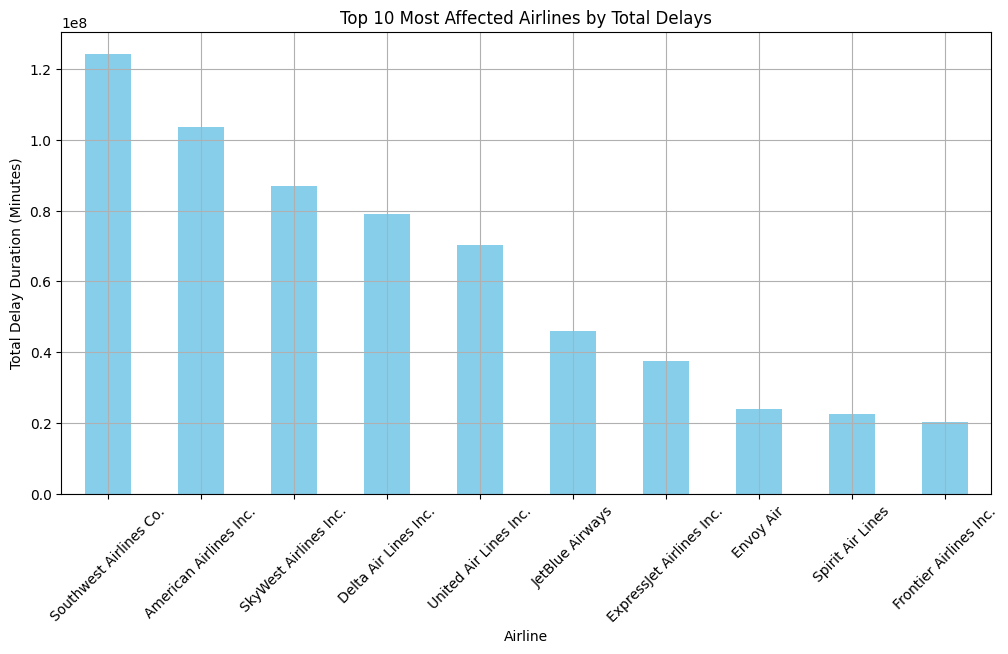

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart of Most Affected Airlines by Total Delays
most_affected_airlines = airline_delay_cleaned.groupby('carrier_name')['arr_delay'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
most_affected_airlines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Affected Airlines by Total Delays')
plt.xlabel('Airline')
plt.ylabel('Total Delay Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

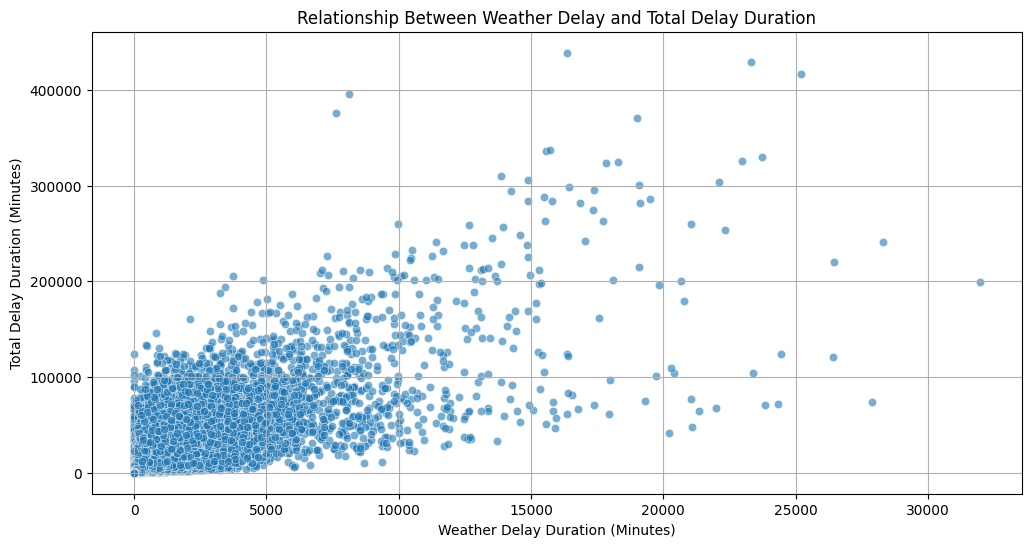

In [20]:
# Scatter Plot for Relationship between Weather Delay and Total Delay
plt.figure(figsize=(12, 6))
sns.scatterplot(data=airline_delay_cleaned, x='weather_delay', y='arr_delay', alpha=0.6)
plt.title('Relationship Between Weather Delay and Total Delay Duration')
plt.xlabel('Weather Delay Duration (Minutes)')
plt.ylabel('Total Delay Duration (Minutes)')
plt.grid(True)
plt.show()